# Feature scaling and Learning Rate

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mine_mat import gradient_descent_houses, compute_cost, compute_gradient

In [2]:
# load the dataset
data = np.loadtxt("C:/Users/moham/Jupyter Notebook/Coursera/data/houses.txt", delimiter=',', skiprows=1)
X_train = data[:,:4]
y_train = data[:,4]
X_features = ['size(sqft)','bedrooms','floors','age']

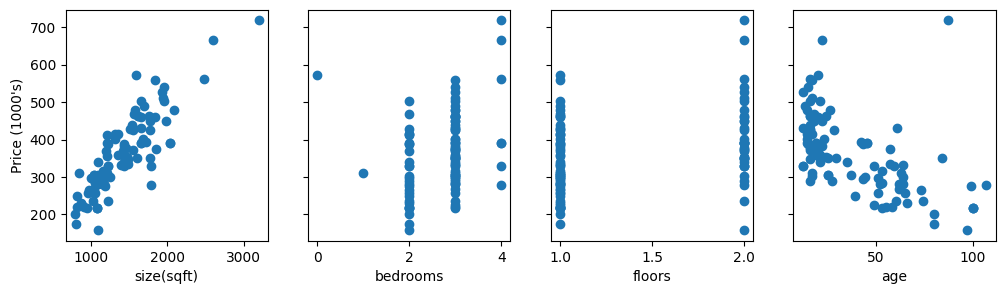

In [3]:
fig,ax=plt.subplots(1, 4, figsize=(12,3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

### Effect of Learning Rate on convergance
Change "alpha" to see the effect of learning rate

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.83563e+04  5.5e-03  1.0e-05  5.2e-06  1.2e-04  3.6e-06 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
       50 8.93052e+03  1.7e-01  3.1e-04  1.6e-04  3.7e-03  1.1e-04 -1.8e+05 -3.3e+02 -1.7e+02 -3.7e+03 -1.2e+02
      100 2.38916e+03  2.3e-01  4.1e-04  2.1e-04  4.7e-03  1.5e-04 -6.1e+04 -1.0e+02 -5.0e+01 -7.7e+02 -4.4e+01
      150 1.66894e+03  2.4e-01  4.4e-04  2.2e-04  4.8e-03  1.7e-04 -2.0e+04 -3.0e+01 -1.1e+01  1.9e+02 -1.7e+01
      200 1.58946e+03  2.5e-01  4.5e-04  2.2e-04  4.6e-03  1.7e-04 -6.7e+03 -5.7e+00  1.9e+00  5.1e+02 -8.7e+00
      250 1.58051e+03  2.5e-01  4.5e-04  2.2e-04  4.3e-03  1.7e-04 -2.2e+03  2.5e+00  6.2e+00  6.2e+02 -5.8e+00
      300 1.57933e+03  2.5e-01  4.4e-04  2.2e-04  4.0e-03  1.8e-04 -7.5e+02  5.2e+00  7.6e+00  6.5e+02 -

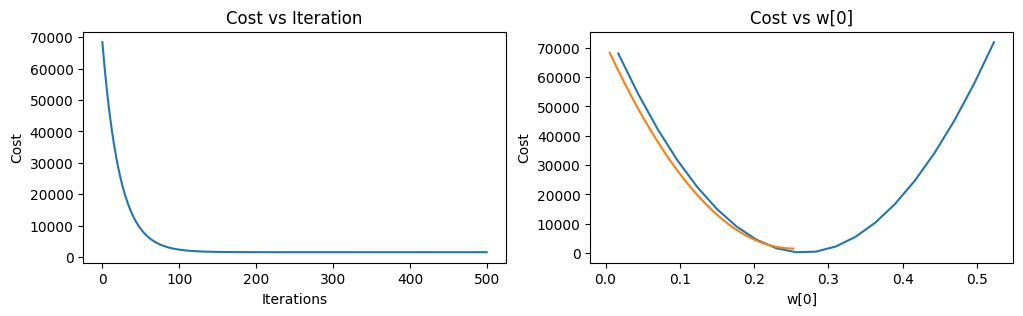

In [20]:
m,n = X_train.shape
w_in = np.zeros(n)
b_in = 0
alpha = 0.1e-7
num_iter = 500
w_fin, b_fin, hist = gradient_descent_houses(X_train, y_train, w_in, b_in, compute_cost, compute_gradient, alpha, num_iter)

ws = np.array([p[0] for p in hist["params"]])
rng = max(abs(ws[:,0].min()),abs(ws[:,0].max()))
wr = np.linspace(-rng+0.27,rng+0.27,20)
cst = [compute_cost(X_train,y_train,np.array([wr[i],-32, -67, -1.46]), 221) for i in range(len(wr))]

fig,ax=plt.subplots(1,2,figsize=(12,3))
ax[0].plot(hist["cost"])
ax[0].set_title("Cost vs Iteration")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Cost")

ax[1].plot(wr,cst)
ax[1].plot(ws[:,0],hist["cost"])
ax[1].set_title("Cost vs w[0]")
ax[1].set_xlabel("w[0]")
ax[1].set_ylabel("Cost")
plt.show()

## Feature Scaling

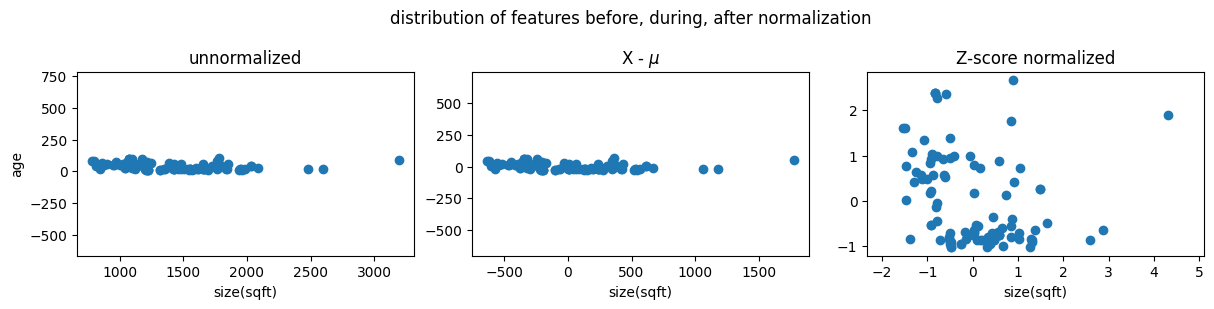

In [23]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1,3,figsize=(12,3))
fig.suptitle("distribution of features before, during, after normalization")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized");ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$");ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized");ax[2].axis('equal')

plt.show()

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
       50 2.77339e+02  9.6e+01 -1.4e+01 -2.4e+01 -4.0e+01  3.6e+02 -5.0e+00  2.3e+00  3.2e+00 -6.3e-01 -1.9e+00
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      150 2.19269e+02  1.1e+02 -2.1e+01 -3.2e+01 -3.8e+01  3.6e+02 -1.7e-01  8.4e-02  9.4e-02 -3.2e-02 -5.0e-05
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      250 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -5.5e-03  2.8e-03  3.1e-03 -1.1e-03 -1.3e-09
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -

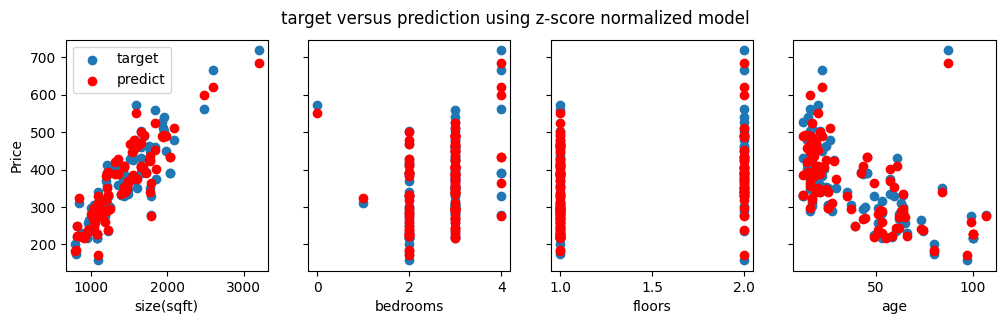

In [27]:
alpha_norm=1e-1
w_norm, b_norm, hist_norm = gradient_descent_houses(X_norm, y_train, w_in, b_in, compute_cost, compute_gradient, alpha_norm, num_iter)

#predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,c='r', label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()